# Tarea 2. NN with Linear regression & perceptron, Problema 2

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
from pandas.tools.plotting import scatter_matrix
from matplotlib.artist import setp
import time

plt.rcParams['figure.figsize'] = (10,16)

In [2]:
df1     = pd.io.excel.read_excel("DatosPunto2.xlsx", sheetname=0)
letters = df1.iloc[:,0].copy()
df1 = df1.iloc[:,1:16].copy()
#normalización min-max
str_comp = 'ARNGOZPT'
df1 = (df1-np.min(df1, axis = 0))/(np.max(df1, axis = 0)-np.min(df1, axis = 0))
#df1 = (df1-np.mean(df1, axis = 0))/(np.std(df1, axis = 0))
X = np.array(df1)

y = -np.ones((X.shape[0],))
i = 0
for L in letters:
    if str_comp.find(L) >= 0:
        print('letra '+str(L)+' aparece en apellidos')
        y[i] = 1
    else:
        print('letra '+str(L)+' no aparece en apellidos')
    i += 1

letra T aparece en apellidos
letra I no aparece en apellidos
letra D no aparece en apellidos
letra N aparece en apellidos
letra G aparece en apellidos
letra S no aparece en apellidos
letra B no aparece en apellidos
letra A aparece en apellidos
letra J no aparece en apellidos
letra M no aparece en apellidos
letra X no aparece en apellidos
letra O aparece en apellidos
letra G aparece en apellidos
letra M no aparece en apellidos
letra R aparece en apellidos
letra F no aparece en apellidos
letra O aparece en apellidos
letra C no aparece en apellidos
letra T aparece en apellidos
letra J no aparece en apellidos
letra J no aparece en apellidos
letra H no aparece en apellidos
letra S no aparece en apellidos
letra O aparece en apellidos
letra J no aparece en apellidos
letra C no aparece en apellidos
letra M no aparece en apellidos
letra W no aparece en apellidos
letra H no aparece en apellidos
letra G aparece en apellidos
letra L no aparece en apellidos
letra L no aparece en apellidos
letra X n

letra I no aparece en apellidos
letra R aparece en apellidos
letra D no aparece en apellidos
letra X no aparece en apellidos
letra Q no aparece en apellidos
letra L no aparece en apellidos
letra R aparece en apellidos
letra H no aparece en apellidos
letra K no aparece en apellidos
letra I no aparece en apellidos
letra A aparece en apellidos
letra D no aparece en apellidos
letra G aparece en apellidos
letra Y no aparece en apellidos
letra A aparece en apellidos
letra U no aparece en apellidos
letra I no aparece en apellidos
letra Q no aparece en apellidos
letra J no aparece en apellidos
letra N aparece en apellidos
letra A aparece en apellidos
letra O aparece en apellidos
letra K no aparece en apellidos
letra M no aparece en apellidos
letra L no aparece en apellidos
letra E no aparece en apellidos
letra G aparece en apellidos
letra H no aparece en apellidos
letra S no aparece en apellidos
letra T aparece en apellidos
letra B no aparece en apellidos
letra A aparece en apellidos
letra W n

letra V no aparece en apellidos
letra F no aparece en apellidos
letra E no aparece en apellidos
letra Z aparece en apellidos
letra U no aparece en apellidos
letra J no aparece en apellidos
letra F no aparece en apellidos
letra F no aparece en apellidos
letra Z aparece en apellidos
letra W no aparece en apellidos
letra J no aparece en apellidos
letra P aparece en apellidos
letra L no aparece en apellidos
letra C no aparece en apellidos
letra A aparece en apellidos
letra X no aparece en apellidos
letra Q no aparece en apellidos
letra A aparece en apellidos
letra W no aparece en apellidos
letra K no aparece en apellidos
letra F no aparece en apellidos
letra E no aparece en apellidos
letra H no aparece en apellidos
letra G aparece en apellidos
letra Y no aparece en apellidos
letra T aparece en apellidos
letra J no aparece en apellidos
letra T aparece en apellidos
letra V no aparece en apellidos
letra A aparece en apellidos
letra V no aparece en apellidos
letra M no aparece en apellidos
let

letra H no aparece en apellidos
letra I no aparece en apellidos
letra W no aparece en apellidos
letra S no aparece en apellidos
letra K no aparece en apellidos
letra L no aparece en apellidos
letra B no aparece en apellidos
letra Y no aparece en apellidos
letra D no aparece en apellidos
letra B no aparece en apellidos
letra P aparece en apellidos
letra G aparece en apellidos
letra L no aparece en apellidos
letra V no aparece en apellidos
letra O aparece en apellidos
letra W no aparece en apellidos
letra Q no aparece en apellidos
letra W no aparece en apellidos
letra U no aparece en apellidos
letra M no aparece en apellidos
letra V no aparece en apellidos
letra U no aparece en apellidos
letra F no aparece en apellidos
letra F no aparece en apellidos
letra W no aparece en apellidos
letra M no aparece en apellidos
letra R aparece en apellidos
letra D no aparece en apellidos
letra D no aparece en apellidos
letra M no aparece en apellidos
letra P aparece en apellidos
letra T aparece en apel

letra H no aparece en apellidos
letra F no aparece en apellidos
letra Y no aparece en apellidos
letra T aparece en apellidos
letra N aparece en apellidos
letra G aparece en apellidos
letra P aparece en apellidos
letra P aparece en apellidos
letra B no aparece en apellidos
letra W no aparece en apellidos
letra Z aparece en apellidos
letra S no aparece en apellidos
letra F no aparece en apellidos
letra J no aparece en apellidos
letra O aparece en apellidos
letra Q no aparece en apellidos
letra Y no aparece en apellidos
letra K no aparece en apellidos
letra Z aparece en apellidos
letra G aparece en apellidos
letra B no aparece en apellidos
letra M no aparece en apellidos
letra H no aparece en apellidos
letra A aparece en apellidos
letra A aparece en apellidos
letra W no aparece en apellidos
letra L no aparece en apellidos
letra T aparece en apellidos
letra P aparece en apellidos
letra J no aparece en apellidos
letra Y no aparece en apellidos
letra N aparece en apellidos
letra E no aparece

letra J no aparece en apellidos
letra S no aparece en apellidos
letra C no aparece en apellidos
letra P aparece en apellidos
letra F no aparece en apellidos
letra W no aparece en apellidos
letra L no aparece en apellidos
letra K no aparece en apellidos
letra L no aparece en apellidos
letra U no aparece en apellidos
letra S no aparece en apellidos
letra X no aparece en apellidos
letra N aparece en apellidos
letra P aparece en apellidos
letra T aparece en apellidos
letra T aparece en apellidos
letra U no aparece en apellidos
letra B no aparece en apellidos
letra M no aparece en apellidos
letra J no aparece en apellidos
letra W no aparece en apellidos
letra Q no aparece en apellidos
letra W no aparece en apellidos
letra J no aparece en apellidos
letra D no aparece en apellidos
letra O aparece en apellidos
letra Q no aparece en apellidos
letra H no aparece en apellidos
letra R aparece en apellidos
letra T aparece en apellidos
letra U no aparece en apellidos
letra K no aparece en apellidos


letra Y no aparece en apellidos
letra H no aparece en apellidos
letra W no aparece en apellidos
letra L no aparece en apellidos
letra I no aparece en apellidos
letra G aparece en apellidos
letra H no aparece en apellidos
letra G aparece en apellidos
letra P aparece en apellidos
letra I no aparece en apellidos
letra G aparece en apellidos
letra P aparece en apellidos
letra Z aparece en apellidos
letra R aparece en apellidos
letra N aparece en apellidos
letra J no aparece en apellidos
letra U no aparece en apellidos
letra U no aparece en apellidos
letra J no aparece en apellidos
letra H no aparece en apellidos
letra S no aparece en apellidos
letra N aparece en apellidos
letra X no aparece en apellidos
letra Y no aparece en apellidos
letra C no aparece en apellidos
letra A aparece en apellidos
letra B no aparece en apellidos
letra M no aparece en apellidos
letra V no aparece en apellidos
letra D no aparece en apellidos
letra K no aparece en apellidos
letra B no aparece en apellidos
letra 

letra I no aparece en apellidos
letra Q no aparece en apellidos
letra Q no aparece en apellidos
letra D no aparece en apellidos
letra V no aparece en apellidos
letra N aparece en apellidos
letra K no aparece en apellidos
letra S no aparece en apellidos
letra H no aparece en apellidos
letra I no aparece en apellidos
letra Q no aparece en apellidos
letra J no aparece en apellidos
letra R aparece en apellidos
letra R aparece en apellidos
letra I no aparece en apellidos
letra Q no aparece en apellidos
letra R aparece en apellidos
letra R aparece en apellidos
letra Y no aparece en apellidos
letra T aparece en apellidos
letra V no aparece en apellidos
letra D no aparece en apellidos
letra W no aparece en apellidos
letra M no aparece en apellidos
letra X no aparece en apellidos
letra M no aparece en apellidos
letra I no aparece en apellidos
letra Z aparece en apellidos
letra R aparece en apellidos
letra C no aparece en apellidos
letra E no aparece en apellidos
letra G aparece en apellidos
let

letra D no aparece en apellidos
letra T aparece en apellidos
letra K no aparece en apellidos
letra Y no aparece en apellidos
letra V no aparece en apellidos
letra X no aparece en apellidos
letra I no aparece en apellidos
letra A aparece en apellidos
letra Z aparece en apellidos
letra J no aparece en apellidos
letra Q no aparece en apellidos
letra E no aparece en apellidos
letra F no aparece en apellidos
letra Q no aparece en apellidos
letra X no aparece en apellidos
letra F no aparece en apellidos
letra J no aparece en apellidos
letra F no aparece en apellidos
letra P aparece en apellidos
letra L no aparece en apellidos
letra R aparece en apellidos
letra G aparece en apellidos
letra E no aparece en apellidos
letra C no aparece en apellidos
letra U no aparece en apellidos
letra N aparece en apellidos
letra V no aparece en apellidos
letra I no aparece en apellidos
letra N aparece en apellidos
letra H no aparece en apellidos
letra E no aparece en apellidos
letra Y no aparece en apellidos


letra Q no aparece en apellidos
letra I no aparece en apellidos
letra A aparece en apellidos
letra Q no aparece en apellidos
letra N aparece en apellidos
letra H no aparece en apellidos
letra K no aparece en apellidos
letra Y no aparece en apellidos
letra Q no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra B no aparece en apellidos
letra U no aparece en apellidos
letra K no aparece en apellidos
letra F no aparece en apellidos
letra G aparece en apellidos
letra Q no aparece en apellidos
letra F no aparece en apellidos
letra H no aparece en apellidos
letra I no aparece en apellidos
letra F no aparece en apellidos
letra L no aparece en apellidos
letra P aparece en apellidos
letra Z aparece en apellidos
letra P aparece en apellidos
letra M no aparece en apellidos
letra V no aparece en apellidos
letra Y no aparece en apellidos
letra X no aparece en apellidos
letra V no aparece en apellidos
letra J no aparece en apellidos
letra O aparece en apellid

letra E no aparece en apellidos
letra L no aparece en apellidos
letra A aparece en apellidos
letra K no aparece en apellidos
letra M no aparece en apellidos
letra R aparece en apellidos
letra S no aparece en apellidos
letra Y no aparece en apellidos
letra V no aparece en apellidos
letra S no aparece en apellidos
letra M no aparece en apellidos
letra O aparece en apellidos
letra L no aparece en apellidos
letra D no aparece en apellidos
letra P aparece en apellidos
letra W no aparece en apellidos
letra O aparece en apellidos
letra E no aparece en apellidos
letra J no aparece en apellidos
letra T aparece en apellidos
letra D no aparece en apellidos
letra C no aparece en apellidos
letra T aparece en apellidos
letra S no aparece en apellidos
letra A aparece en apellidos


In [3]:
X_original = X

Nsamples = X.shape[0]
Ntrain   = int(0.7*Nsamples)
Nval     = int(0.15*Nsamples)
Ntest    = Nsamples-Ntrain-Nval

X_test = X[(Nsamples-Ntest):Nsamples,:]
y_test = y[(Nsamples-Ntest):Nsamples  ]

Xv = X[0:(Nsamples-Ntest),:]
yv = y[0:(Nsamples-Ntest)  ]

In [4]:
def derivating(fx):
    difcoefs = [1,-1]
    return np.convolve(fx,difcoefs,mode='same')

def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

def clearList(L): #arroja una lista de L elementos vacios, no sabia de qué otra forma hacerla
    listica = []
    for i in range(0,L):
        listica.append([]);
    return listica

def sigmoid(x):
    return 1/(1+np.exp(-x))

def Perceptron_training(X,y,iteraciones=500,de_min=0.01):
    w_array     = []
    p_i         = []
    
    w_          = np.zeros(X.shape[1] + 1,)
    n           = X.shape[0]
    nf          = X.shape[1]
    sw          = 0
    j           = 0
    index       = []
    error_array = []
    
    while j < iteraciones and sw == 0:
        print('iteración: '+str(j+1))
        for i in range(0,n):
            g1  = np.sum(w_*np.insert(X[i,:],0,1))
            #print(g1)
            yp  = 2*sigmoid(g1)-1
            #print(yp*y[i])
            #print(str(j)+'. valor predicho: '+str(yp)+ ', etiqueta: '+str(y[i]))
            if yp*y[i] <= 0:
                w_ = w_ + np.insert(X[i,:],0,1)*y[i]
        
        w_array.append(w_)
        predicted = []
        for i in range(0,n):
            predicted.append(Predict(X[i,:],w_))
        p_i.append(predicted)
        E = 0
        for i in range(0,n):
            if predicted[i]*y[i]<0:
                E += -predicted[i]*y[i]
        index.append(j)
        error_array.append(E)
        #print(d_error_array[j])
        
        #if np.abs(d_error_array[len(d_error_array)-1]) < de_min:
        #   sw = 1
        
        j = j + 1
    #print('Función de error: '+str(E[0])+' iterando ' +str(j)+' veces')
    plt.plot(error_array,'b')
    plt.title('función de error')
    plt.xlabel('Iteraciones')
    plt.show()
    
    iter_min = np.argmin(error_array)
    print('iteracción óptima: '+str(iter_min)+ ', función de error: '+str(error_array[iter_min]))
    return [w_array[iter_min],p_i[iter_min]]

def Predict(X,w_):
    g = np.dot(w_.T,np.insert(X,0,1))
    return 2*sigmoid(g)-1

### Entrenamiento de la red neuronal usando validación bootstraping 

In [5]:
index=np.random.permutation(Xv.shape[0])
X1    = Xv[index,:]
y1    = yv[index]

X_train = X1[0:Ntrain,:]
X_val   = X1[Ntrain:(Ntrain+Nval),:]
y_train = y1[0:Ntrain  ]
y_val   = y1[Ntrain:(Ntrain+Nval)  ]

iteración: 1
iteración: 2
iteración: 3
iteración: 4
iteración: 5
iteración: 6
iteración: 7
iteración: 8
iteración: 9
iteración: 10
iteración: 11
iteración: 12
iteración: 13
iteración: 14
iteración: 15
iteración: 16
iteración: 17
iteración: 18
iteración: 19
iteración: 20
iteración: 21
iteración: 22
iteración: 23
iteración: 24
iteración: 25
iteración: 26
iteración: 27
iteración: 28
iteración: 29
iteración: 30
iteración: 31
iteración: 32
iteración: 33
iteración: 34
iteración: 35
iteración: 36
iteración: 37
iteración: 38
iteración: 39
iteración: 40
iteración: 41
iteración: 42
iteración: 43
iteración: 44
iteración: 45
iteración: 46
iteración: 47
iteración: 48
iteración: 49
iteración: 50


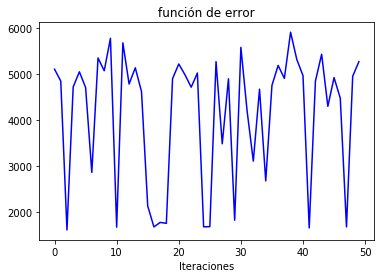

iteracción óptima: 2, función de error: 1611.6465842946322


,etiquetas de validación,multiplicación,valores predichos
0,-1.0,-0.337361,0.337361
1,1.0,0.331439,0.331439
2,1.0,-0.119427,-0.119427
3,-1.0,0.954689,-0.954689
4,1.0,-0.169460,-0.169460
5,1.0,0.682262,0.682262
6,-1.0,0.250134,-0.250134
7,-1.0,0.106264,-0.106264
8,1.0,0.686984,0.686984
9,-1.0,0.818122,-0.818122


In [6]:
[wPERC,predicted1] = Perceptron_training(X_train,y_train,iteraciones=50,de_min=0.001)
Accuracy_train = np.sum(np.array(predicted1)*y_train > 0)/y_train.shape[0]
predicted2 = []
for j in range(0,X_val.shape[0]):
    predicted2.append(Predict(X_val[j,:],wPERC))
Accuracy_val = np.sum(np.array(predicted2)*y_val > 0)/y_val.shape[0]
d = {'valores predichos': predicted2, 'etiquetas de validación' : y_val, 'multiplicación' : np.array(predicted2)*y_val}
df = pd.DataFrame(data=d)
df


In [7]:
print('tasa de entrenamiento: '+ str(Accuracy_train)+', tasa de validación: '+str(Accuracy_val))

tasa de entrenamiento: 0.6680714285714285, tasa de validación: 0.6646666666666666
